In [1]:
import numpy as np
import torch
import random
import copy
import matplotlib.pyplot as plt

In [4]:
from load_data import *
from poison_utils import *

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../data/compas_proc.csv')

In [7]:
df.head()

,Unnamed: 0,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age,c_charge_degree,sex,race,is_recid
0,0,0,0,0,0,69,1.0,0.0,2.0,0.0
1,1,0,0,0,0,34,1.0,0.0,1.0,1.0
2,2,0,0,1,4,24,1.0,0.0,1.0,1.0
3,3,0,1,0,1,23,1.0,0.0,1.0,0.0
4,4,0,0,0,2,43,1.0,0.0,2.0,0.0


In [29]:
df[attrs_for_classification]

,priors_count,juv_other_count,juv_fel_count,age,c_charge_degree,juv_misd_count
0,0,0,0,69,1.0,0
1,0,0,0,34,1.0,0
2,4,1,0,24,1.0,0
3,1,0,0,23,1.0,1
4,2,0,0,43,1.0,0
...,...,...,...,...,...,...
7209,0,0,0,23,1.0,0
7210,0,0,0,23,1.0,0
7211,0,0,0,57,1.0,0
7212,3,0,0,33,0.0,0


In [27]:
attrs = df.columns
target_attr = ['is_recid']

sensitive_attrs = ['race']
attrs_to_ignore = ['race','sex','Unnamed: 0']
    
df['race'] = df['race'].map({1.0:1.0, 0.0: 0.0,2.0:1.0})
    
attrs_for_classification = set(attrs) - set(attrs_to_ignore) - set(target_attr)
X = df[attrs_for_classification].values
y = df[target_attr].values
Z = df[sensitive_attrs].values

In [31]:
print(X.shape)
print(X[:2])

(7214, 6)
[[ 0.  0.  0. 69.  1.  0.]
 [ 0.  0.  0. 34.  1.  0.]]


In [10]:
df.columns

Index(['Unnamed: 0', 'age', 'fnlwgt', 'education-num', 'marital-status',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age.1', 'fnlwgt.1', 'education-num.1',
       'marital-status.1', 'race.1', 'sex.1', 'capital-gain.1',
       'capital-loss.1', 'hours-per-week.1', 'native-country.1', 'income.1',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'education_high-school', 'education_prim-middle-school',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing

In [20]:
X_tr, X_te, y_tr, y_te, xs_tr, xs_te = load_lsac_data(svm=True,random_state=42,intercept=False)

In [21]:
print(X_te.shape)
print(X_tr.shape)

(7966, 9)
(18585, 9)


In [9]:
X_te.shape

(13567, 51)

In [5]:
print(100-sum(y_te==1)/len(y_te)*100)

74.83599911550084


In [6]:
xs_tr

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [7]:
print(min(sum(xs_te==0)/sum(xs_te==1),sum(xs_te==1)/sum(xs_te==0)))

[0.48516694]


In [45]:
import pandas as pd

In [46]:
aa = pd.read_csv("../data/adult.data")

In [47]:
aa

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [40]:
xx,yy,zz = shuffle_array([X_tr,y_tr,xs_tr])

In [41]:
print(xx.shape, X_tr.shape)

(28489, 51) (31655, 51)


In [26]:
from fairLR_train import *

In [27]:
xs_tep =  poison_Z(xs_te,pos_rt = 0.1, rs = 3)

In [28]:
train_flr(data = 'adult',save_dir = '../results', filename = 'adult_FLR_model')

load data: adult
{'sex': array([0., 1., 0., ..., 0., 1., 0.])}
for svm min:  -1.0 and max:  1.0
45222
(45222, 1)
train FLR model
{0: 0}
save model
saved in  ../results/adult_adult_FLR_model.sm
save testdata
saved in  ../results/adult_flr_testX.te ../results/adult_flr_testY.te ../results/adult_flr_testZ.te


In [34]:
X_tr.shape

(34189, 56)

In [29]:
from fairLR_test import *
from save_utils import load_flr, load_nparray,save_prediction

In [30]:
from fair_eval import *

In [35]:
coef.shape

(51,)

In [32]:
coef = load_flr( '../results/adult_adult_FLR_model.sm')
pred = predict_FairLR(X_te,coef)

ValueError: shapes (14653,56) and (51,) not aligned: 56 (dim 1) != 51 (dim 0)

In [33]:
print(len(xs_te))
rep = 10
ress = []
for rt in [0.0,0.005,0.01]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    for j in range(rep):
        xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 4*j+1)
        res = test_FLR_avg_diff(X_te, y_te,xs_tep,load_path = '../results/adult_adult_FLR_model.sm')
        if j==0:
            res_sum = res
        else:
            res_sum = add_res(res, res_sum)
    res_sum = divide_res(res_sum,rep)
    ress.append(res_sum)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()
    print_res(res_sum)
#     test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

14653
poisoned ratio:  0.0


ValueError: shapes (14653,56) and (51,) not aligned: 56 (dim 1) != 51 (dim 0)

In [86]:
print(sum(y_te==1)/len(y_te))

0.11891772338543202


In [87]:
for res in ress:
    print_res(res)

accuary :  90.03243880861102
dispImp :  0.9384783772553551
dispMisclf :  2.2550453161227675
dispFPR :  0.046206229247305546
dispFNR :  0.9180542436085017
odds :  {-1.0: 0.046206229247305546, 1.0: 0.9180542436085071}
accuary :  90.03243880861102
dispImp :  0.9288786794976722
dispMisclf :  2.259975148125447
dispFPR :  0.07280289873920764
dispFNR :  1.050832563756503
odds :  {-1.0: 0.07280289873920764, 1.0: 1.0508325637565015}
accuary :  90.03243880861102
dispImp :  0.8775081488523844
dispMisclf :  2.2494368360459718
dispFPR :  0.06702939096160061
dispFNR :  1.2917128650335263
odds :  {-1.0: 0.06702939096160061, 1.0: 1.291712865033527}


In [ ]:
accuary :  0.7800000000000008
dispImp :  95.85313706114012
dsipMisclf :  81.05185286535512
dispFPR :  84.47226480793788
dispFNR :  69.86858984534416
odds :  {-1: 84.47226480793788, 1: 96.4281597958115}

In [28]:
print_res(res)

accuary :  0.78
dispImp :  96.28606687430216
dsipMisclf :  77.09754748294301
dispFPR :  77.04248366013073
dispFNR :  67.46031746031747
odds :  {-1: 77.04248366013073, 1: 96.40035118525022}


# LR training and test

In [24]:
from sklearn import linear_model as lm

In [25]:
clf2 = lm.LogisticRegression()
clf2.fit(X_tr,y_tr)

LogisticRegression()

In [26]:
def test_LR_avg(clf,X_te, y_te,xs_te):
    pred = clf.predict(X_te)
    pred = pred.flatten()
    y_te = y_te.flatten()
    xs_te = xs_te.flatten()
    res = {}
    res['accuary'] = calculate_overall_accuracy(pred,y_te,True)
    res['dispImp'] = calculate_impact(pred,y_te,xs_te)
    res['dsipMisclf'] = calculate_misclassification(pred,y_te,xs_te)
    res['dispFPR'] = calculate_mistreatment(pred,y_te,xs_te,cond=-1)
    res['dispFNR'] = calculate_mistreatment(pred,y_te,xs_te,cond=1)
    res['odds'] = calculate_odds_clf(pred,y_te,xs_te,return_val = True)
    return res

In [27]:
def test_LR(clf,X_te, y_te,xs_te):
    pred = clf.predict(X_te)
    calculate_overall_accuracy(pred,y_te)
    calculate_prule_clf(pred,y_te,xs_te)
    calculate_odds_clf(pred,y_te,xs_te)

1584
poisoned ratio:  0.0


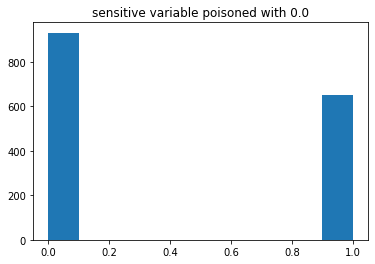

accuary :  0.6824494949494949
dispImp :  41.187680789518474
dsipMisclf :  85.81607670623579
dispFPR :  29.718826405867965
dispFNR :  52.99485226711796
odds :  {-1: 29.718826405867965, 1: 59.22559334475166}
poisoned ratio:  0.01


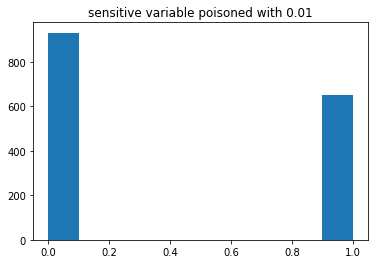

accuary :  0.6824494949494949
dispImp :  41.52139330143906
dsipMisclf :  86.24614496831992
dispFPR :  30.239135272057364
dispFNR :  53.083913853560276
odds :  {-1: 30.239135272057364, 1: 59.359734383246256}
poisoned ratio:  0.05


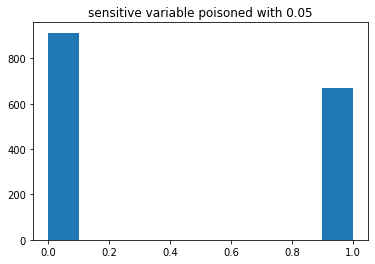

accuary :  0.6824494949494949
dispImp :  43.610423214161486
dsipMisclf :  85.84066253246488
dispFPR :  31.845542519072342
dispFNR :  55.0168320984035
odds :  {-1: 31.845542519072342, 1: 61.799995536966605}
poisoned ratio:  0.1


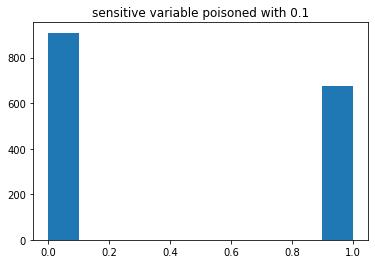

accuary :  0.6824494949494949
dispImp :  46.18237079018337
dsipMisclf :  86.24415058705138
dispFPR :  34.22878925637983
dispFNR :  57.07592556659057
odds :  {-1: 34.22878925637983, 1: 64.2692322892489}
poisoned ratio:  0.2


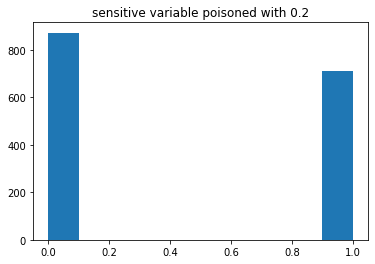

accuary :  0.6824494949494949
dispImp :  51.413929591822104
dsipMisclf :  87.55137295791775
dispFPR :  39.79594712003604
dispFNR :  61.122467434137874
odds :  {-1: 39.79594712003604, 1: 68.79564209756917}
poisoned ratio:  0.3


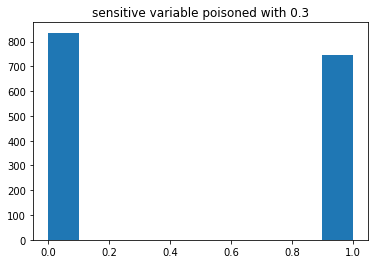

accuary :  0.6824494949494949
dispImp :  56.825155197727966
dsipMisclf :  90.96872758470627
dispFPR :  47.407473418101475
dispFNR :  64.18754280208952
odds :  {-1: 47.407473418101475, 1: 72.19245417013788}


In [28]:
print(len(xs_te))
rep = 10
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    for j in range(rep):
        xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3*j)
        res = test_LR_avg(clf2,X_te, y_te,xs_tep)
        if j==0:
            res_sum = res
        else:
            res_sum = add_res(res, res_sum)
    res_sum = divide_res(res_sum,rep)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()
    print_res(res_sum)
#     test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

300
poisoned ratio:  0.0


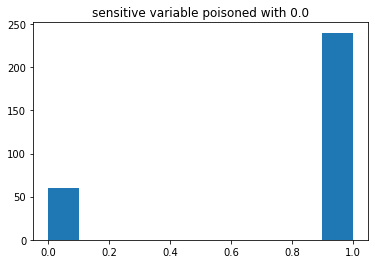

Overall accuracy: 0.7933333333333333
disparate impact:  100.0
disparate misclassification rate:  61.11111111111111
disparate false positive rate: 70.90909090909092
disparate false negative rate: 90.3114186851211
equalized opportunity for -1 : 70.90909090909092
equalized opportunity for 1 : 98.9618094178717
poisoned ratio:  0.01


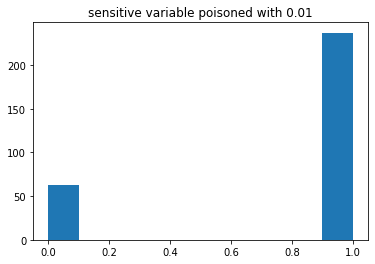

Overall accuracy: 0.7933333333333333
disparate impact:  99.21507064364208
disparate misclassification rate:  64.9789029535865
disparate false positive rate: 74.76923076923076
disparate false negative rate: 84.31372549019608
equalized opportunity for -1 : 74.76923076923076
equalized opportunity for 1 : 98.30866807610995
poisoned ratio:  0.05


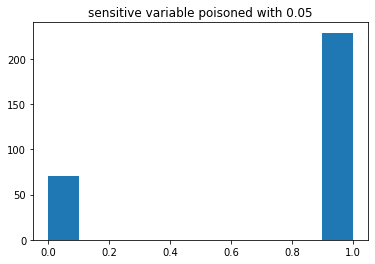

Overall accuracy: 0.7933333333333333
disparate impact:  98.9596670934699
disparate misclassification rate:  60.53233520482429
disparate false positive rate: 71.15749525616698
disparate false negative rate: 98.20359281437126
equalized opportunity for -1 : 71.15749525616698
equalized opportunity for 1 : 99.80617024713293
poisoned ratio:  0.1


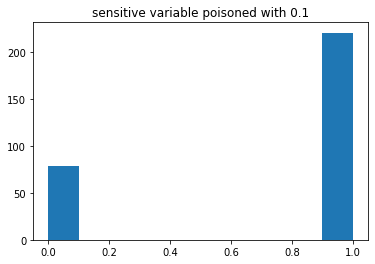

Overall accuracy: 0.7933333333333333
disparate impact:  92.17092266042292
disparate misclassification rate:  60.61381074168798
disparate false positive rate: 82.25324027916251
disparate false negative rate: 66.2551440329218
equalized opportunity for -1 : 82.25324027916251
equalized opportunity for 1 : 95.18213866039953
poisoned ratio:  0.2


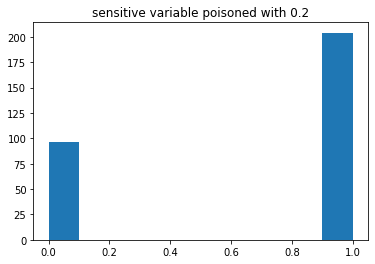

Overall accuracy: 0.7933333333333333
disparate impact:  96.83544303797468
disparate misclassification rate:  65.15837104072399
disparate false positive rate: 77.81954887218045
disparate false negative rate: 75.2895752895753
equalized opportunity for -1 : 77.81954887218045
equalized opportunity for 1 : 96.8395061728395
poisoned ratio:  0.3


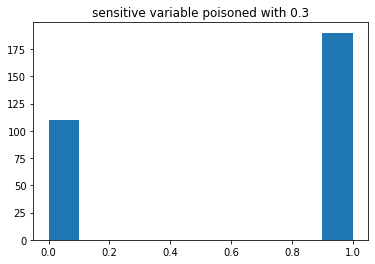

Overall accuracy: 0.7933333333333333
disparate impact:  99.37733499377336
disparate misclassification rate:  70.30075187969925
disparate false positive rate: 76.92307692307692
disparate false negative rate: 94.20289855072464
equalized opportunity for -1 : 76.92307692307692
equalized opportunity for 1 : 99.36


In [24]:
print(len(xs_te))
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()

    test_LR(clf2,X_te,y_te,xs_tep)

In [25]:
bank = pd.read_csv('../data/bank-full.csv')

In [26]:
print(bank)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd